In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("dataset.csv")
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Preprocessing

In [5]:
print(f"DataSet have {raw_data.duplicated().sum()} duplicated records.\n")
raw_data.drop_duplicates(inplace=True)

for col in raw_data.columns:
    print(f"Column '{col}' have '{raw_data[col].isnull().sum()}' Null/NaN values.")

DataSet have 1 duplicated records.

Column 'age' have '0' Null/NaN values.
Column 'sex' have '0' Null/NaN values.
Column 'bmi' have '0' Null/NaN values.
Column 'children' have '0' Null/NaN values.
Column 'smoker' have '0' Null/NaN values.
Column 'region' have '0' Null/NaN values.
Column 'charges' have '0' Null/NaN values.


In [6]:
raw_data["region"].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
for col in ["smoker", "region", "sex"]:
    raw_data[col] = Le.fit_transform(raw_data[col])

# raw_data.replace(to_replace=["male","female"], value=[0,1], inplace=True)
# raw_data.replace(to_replace=["yes","no"], value=[0,1], inplace=True)
# raw_data.replace(to_replace=["southeast","southwest", "northwest", "northeast"], value=[0,1,2,3], inplace=True)

raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


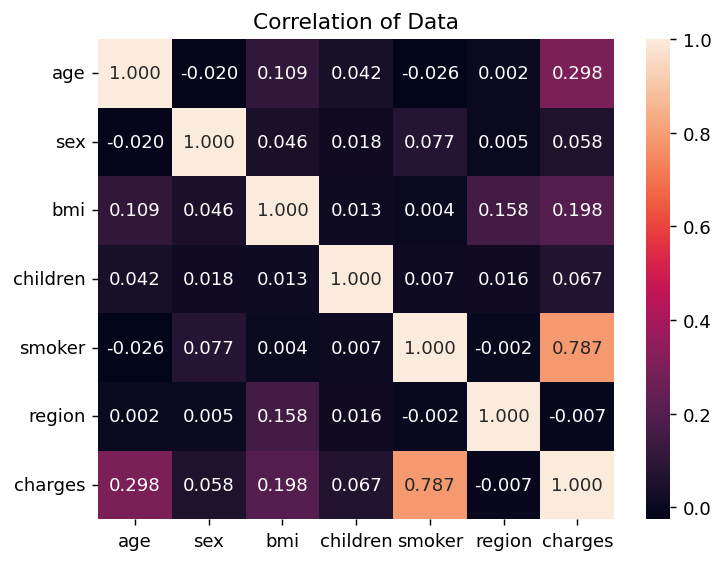

In [8]:
plt.figure(dpi=130)
sns.heatmap(raw_data.corr(), annot=True, fmt= '.3f')
plt.title("Correlation of Data")
plt.show()

In [9]:
corr = raw_data.corr()
corr['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

In [10]:
def boxplot_easy(df):
    fig, axs = plt.subplots(df.columns.size, 1, dpi=95, figsize=(7,8))
    i = 0
    for col in df.columns:
        axs[i].boxplot(df[col], vert=False)
        axs[i].set_ylabel(col)
        i+=1
    plt.show()

In [11]:
''' Because of low correlation between children and sex and region with charges column, 
    we can drop children and children and region columns '''

raw_data.drop(columns=["children", "sex", "region"], inplace=True, errors="ignore")
raw_data

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


## Visualization Data 

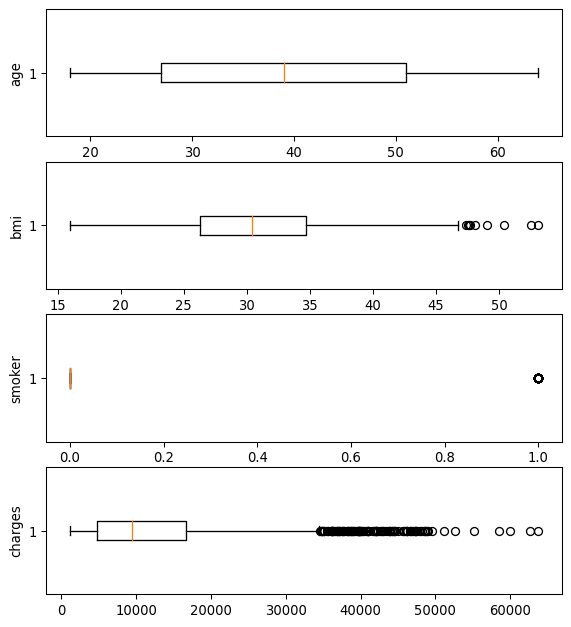

In [12]:
''' Boxplot shows outliers data in each columns. We can drop outliers from our data'''

boxplot_easy(raw_data)

C:\Users\armin\AppData\Local\Temp\ipykernel_12788\2350003074.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_outlier = no_outlier[(raw_data[col] >= lower_bound) & (raw_data[col] <= upper_bound)]


(1181, 4)


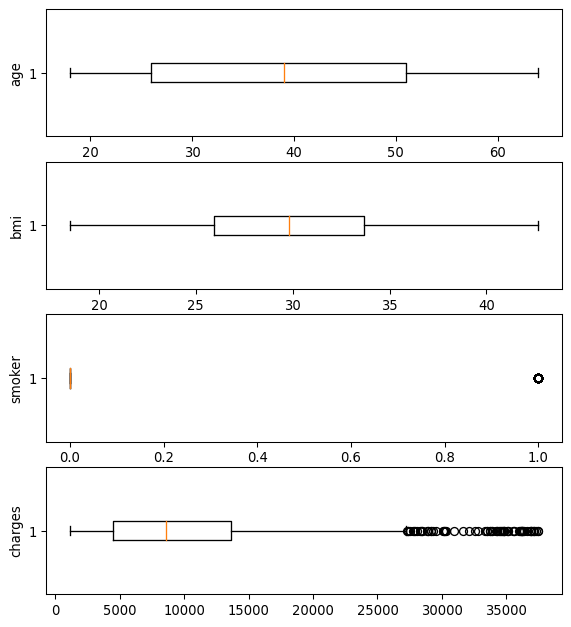

In [13]:
no_outlier = raw_data

for col in raw_data.columns:
    mean = raw_data[col].mean()
    std = raw_data[col].std()
    

#     Q1 = raw_data[col].quantile(0.25)
#     Q3 = raw_data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5*IQR
#     upper_bound = Q3 + 1.5*IQR
    
    lower_bound = mean - std*2
    upper_bound = mean + std*2
    
#     print('Lower Bound :',lower_bound)
#     print('Upper Bound :',upper_bound)
    
    no_outlier = no_outlier[(raw_data[col] >= lower_bound) & (raw_data[col] <= upper_bound)]

print(no_outlier.shape)

boxplot_easy(no_outlier)

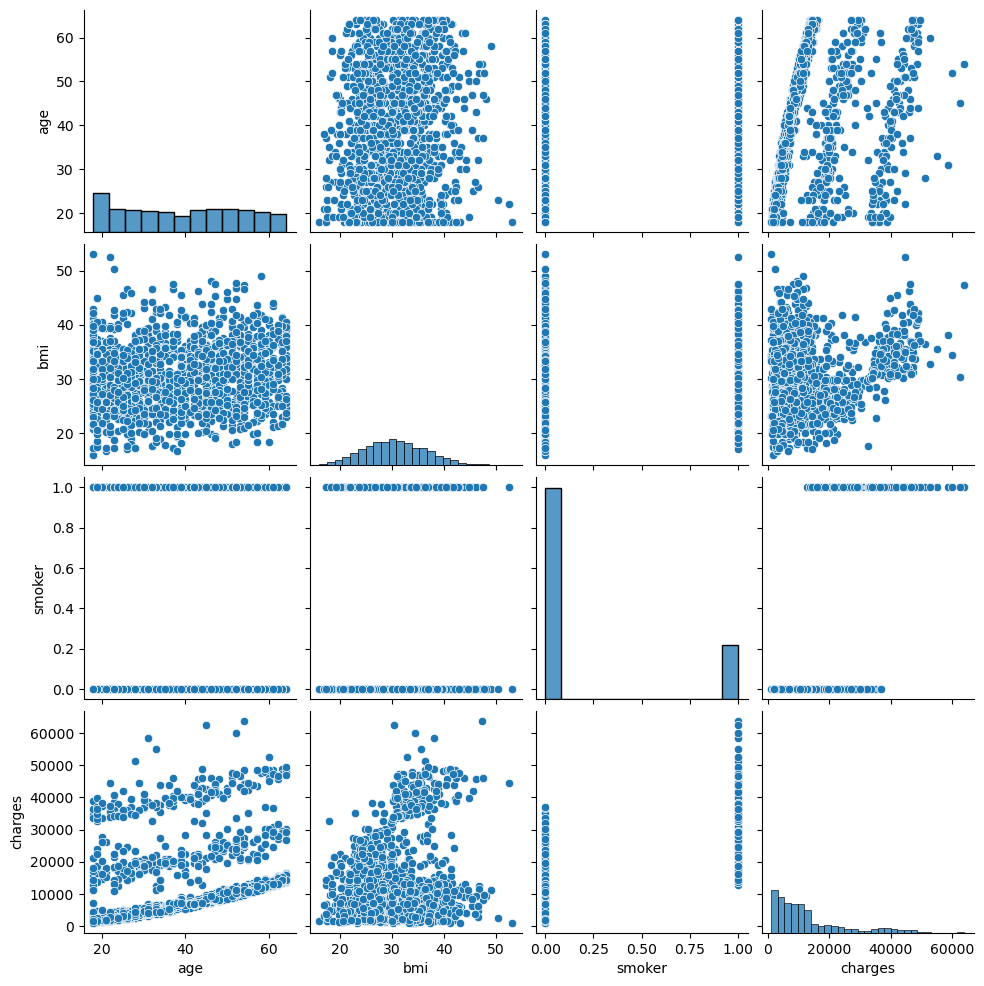

In [14]:
sns.pairplot(raw_data)
plt.show()

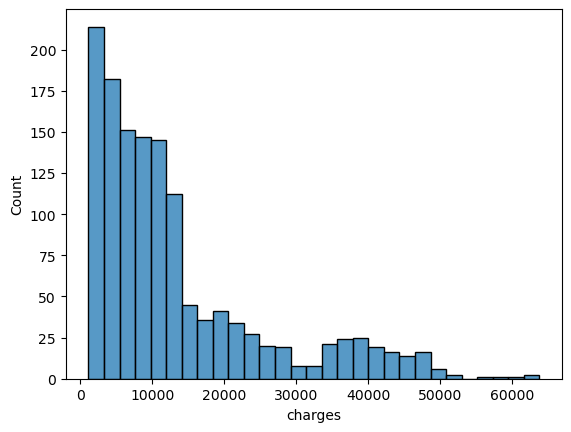

In [15]:
# plt.hist(raw_data["charges"],bins=24, color="green")
sns.histplot(raw_data["charges"])
plt.xlabel("charges")
plt.show()

# Modeling

In [16]:
X_Data = no_outlier.drop(columns=["charges"])
Y_Data = no_outlier["charges"]
# X_Data,Y_Data

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X_Data)

X_Scaled

array([[-1.39986115, -0.3961191 ,  2.50801185],
       [-1.47067265,  0.70465024, -0.3987222 ],
       [-0.76255768,  0.5602563 , -0.3987222 ],
       ...,
       [-1.47067265,  1.28222597, -0.3987222 ],
       [-1.25823816, -0.78992073, -0.3987222 ],
       [ 1.57422172, -0.17671533,  2.50801185]])

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y_Data, test_size=0.25, random_state=42)
# x_train, x_test, y_train, y_test

In [19]:
# collect models accuracy, to find the maximum accuracy
acc = {}

###  Linear Regression

In [20]:
def evaluation(predict_data):
    print("R^2:", r2_score(y_test, predict_data))
    print("MAE:", mean_absolute_error(y_test, predict_data))
    print("MSE:", mean_squared_error(y_test, predict_data))
    print("RMSE:", mean_squared_error(y_test, y_predict, squared=False))


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc.update({'LinearRegression': r2_score(y_test, y_predict)})
evaluation(y_predict)

R^2: 0.6131809108041282
MAE: 3153.0058775910725
MSE: 24614882.84434991
RMSE: 4961.3388157179825


In [22]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc.update({'SVR': r2_score(y_test, y_predict)})
evaluation(y_predict)

R^2: -0.04005063242108031
MAE: 5854.909171409844
MSE: 66182681.21786928
RMSE: 8135.273887083906


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc.update({'GradientBoostingRegressor': r2_score(y_test, y_predict)})
evaluation(y_predict)

R^2: 0.6683047274872715
MAE: 2820.477006036269
MSE: 21107128.63188413
RMSE: 4594.249517808554


In [24]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc.update({'BayesianRidge': r2_score(y_test, y_predict)})
evaluation(y_predict)

R^2: 0.6132282070229871
MAE: 3154.18504220664
MSE: 24611873.19224455
RMSE: 4961.035495967001


In [25]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc.update({'ElasticNet': r2_score(y_test, y_predict)})
evaluation(y_predict)

R^2: 0.5367941256462596
MAE: 3702.653634033511
MSE: 29475686.82231845
RMSE: 5429.151574815208


In [26]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc.update({'KernelRidge': r2_score(y_test, y_predict)})
evaluation(y_predict)

R^2: -1.1416755710208766
MAE: 10566.601213002827
MSE: 136283587.71247447
RMSE: 11674.056180799991


In [27]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc.update({'SGDRegressor': r2_score(y_test, y_predict)})
evaluation(y_predict)

R^2: 0.6128873402345972
MAE: 3137.2647433885013
MSE: 24633563.941993196
RMSE: 4963.221125639397


# Evaluation Model

In [29]:
acc

{'LinearRegression': 0.6131809108041282,
 'SVR': -0.04005063242108031,
 'GradientBoostingRegressor': 0.6683047274872715,
 'BayesianRidge': 0.6132282070229871,
 'ElasticNet': 0.5367941256462596,
 'KernelRidge': -1.1416755710208766,
 'SGDRegressor': 0.6128873402345972}

In [40]:
MAX_ACCURACY = [0, ""]
for _key, _acc in acc.items():
    if _acc >= MAX_ACCURACY[0]:
        MAX_ACCURACY = [_acc, _key]
        
print(f"Model '{MAX_ACCURACY[1]}' have best accuracy in other models with {MAX_ACCURACY[0]* 100} accuracy")
# MAX_ACCURACY

Model 'GradientBoostingRegressor' have best accuracy in other models with 66.83047274872716 accuracy
